<CENTER>
    <a href="http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html" class="icons"><img src="../../images/ATLASOD.gif" style="width:40%"></a>
</CENTER>

<CENTER><h1>Searching for the Higgs boson in the H&#8594;ZZ; channel</h1></CENTER>

Welcome, fellow particle hunters! In this notebook, we are searching for the Higgs boson in the four-lepton (ZZ) decay channel using ATLAS Open Data  (similar to other examples [here](https://opendata.atlas.cern/docs/documentation/example_analyses/analysis_examples_education_2020/)). But, what exactly is this Higgs boson? It is a fundamental particle in the Standard Model (SM) of particle physics, which explains how particles acquire mass. The SM describes how everything is made of 12 different types of matter particles (fermions), interacting with 3 of the 4 fundamental forces that have their correspondent interaction mediating particles (bosons), all bound together by the
Higgs boson.

<CENTER><img src="../../images/Standard Model of Elementary Particles.svg" style="width:30%"></CENTER>
 
The Higgs boson was discovered in 2012 by the ATLAS and CMS experiments at the Large Hadron Collider (LHC).The Higgs boson decays instantly into various particles after it is produced, including four lepthon (H→ZZ).

<CENTER><img src="../../images/HiggsDecays.png" style="width:30%"></CENTER>

</CENTER>

Let's use a current ATLAS Open Data sample to create a histogram. But first, let's familiarize ourselves with the computational environment.

# About Jupyter notebooks and ROOT 

## What is a jupyter notebook? 
A Jupyter Notebook is an interactive tool where you can write and run code, add explanations, and include visualizations all in one document. It's the page you're on right now, allowing you to mix programming with descriptive text and see the results instantly.

If you want to learn more please visit: https://jupyter.org/

## What about ROOT?

ROOT is a system developed by CERN for analyzing large amounts of scientific data. It provides tools to create histograms and graphs, fit curves, perform statistical analysis, and handle matrix algebra. It also supports calculations with four-vectors, standard mathematical functions, and multivariate analysis, including neural networks. ROOT makes it easy to generate files in various graphic formats and integrates with Python code and Monte Carlo event generators.

A key feature of ROOT is its data container called a "tree," which acts like a sliding window over the raw data stored in a file. Trees allow for efficient data access, handling memory allocation issues and buffering transparently.

On July 4, 2012, the ATLAS experiments used ROOT to create all the graphs presented in the search for the Higgs boson, highlighting its importance in large-scale scientific data analysis. It is the tool we will be using here too!
For more documentation: https://root.cern/about/

**note:** Certainly! Here's an improved version of your note:

Note: If you need to install any of the required software or tools, please refer to: https://github.com/whyyorlantaken/ATLAS-Open-Data-Challenge/tree/main
- In english: https://github.com/britssc/Round-Cow-Club/blob/main/installation/installation.md
- In spanish: https://github.com/britssc/Round-Cow-Club/blob/main/installation/instalaciones.md

Now, let's dive into the code.

In [1]:
import ROOT
from ROOT import TMath
import time

This code imports the ROOT library and its mathematical functions, and also imports the time module for time-related operations. This setup allows you to use ROOT's tools for data analysis and timing functions in your script.

In [2]:
%jsroot on

The %jsroot command activates the ROOT JavaScript mode (JSROOT), enabling interactive visualization of graphs and data in a web environment.

When you run %jsroot on in a Jupyter notebook, you enable the capability to display interactive ROOT-generated graphs directly within the notebook using modern web technologies like JavaScript and HTML5. This provides a more dynamic and visually rich experience for exploring and analyzing data.

In [3]:
start = time.time()

The command start = time.time() is used to record the current time in seconds. It is primarily used to measure how long a piece of code takes to execute.

In [21]:
f = ROOT.TFile.Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_D.4lep.root")

- TFile: This is a class in ROOT that handles ROOT files. These files usually contain large amounts of structured data and are used to store and access experimental data.

- Open: This is a method of the TFile class that opens a ROOT file. It can open local files or remote files via a URL.

- File URL: "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_D.4lep.root" is the location of the data file on the web. In this case, it is a publicly accessible file containing experimental particle physics data. You can even download the data to your computer.

This line of code does the following:

1. Uses ROOT to open a data file located at a URL.
2. Assigns the opened file to the variable f.

In other words, f now contains the ROOT file, which can be used to read and analyze the data stored in it.

In [22]:
canvas = ROOT.TCanvas("Canvas","cz",800,600)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


This line creates a canvas in ROOT, which is a graphical window where you can draw graphs and visualize data.

- ROOT.TCanvas: This is a class in ROOT that creates a canvas for drawing.
- "Canvas": This is the internal name of the canvas.
- "cz": This is the title of the canvas that appears in the window.
- 800: This is the width of the canvas in pixels.
- 600: This is the height of the canvas in pixels.

This line creates a graphical window called "cz" with a size of 800x600 pixels for visualizing graphs and data.

In [23]:
tree = f.Get("mini")

This line of code retrieves a data tree stored in the ROOT file.

- f: This is the ROOT file you previously opened.
- Get("mini"): This is a method used to obtain an object stored in the file. In this case, it retrieves a data tree named "mini."
- tree: This is the variable that stores the retrieved data tree.

This line accesses the data tree named "mini" in the ROOT file f and saves it in the variable tree so you can work with it.

In [24]:
tree.GetEntries()
#tree.Print()

400

The line of code tree.GetEntries() is used to get the total number of entries (or events) in a data tree in ROOT. Here’s a simpler explanation:

- tree: This is the variable that contains the data tree you accessed previously.
- GetEntries(): This is a method that returns the total number of entries in the tree.

In summary, tree.GetEntries() tells you how many events or rows of data are in the tree.

Now we're going to extract the photons variables. 

# About the invariant mass: 

The Large Hadron Collider (LHC) at CERN accelerates protons to near light speed and then collides them. These high-energy collisions produce a variety of particles, including the Higgs boson. Detectors surrounding the collision points, such as ATLAS and CMS, record the trajectories, energies, and other properties of these decay products of these collitions. We often use invariant mass to identify particles these particles. The invariant mass is a quantity calculated from the energy and momentum of two particles (in this case, four leptons) and remains constant regardless of the reference frame. When four leptons are produced from the decay of a Higgs boson, their invariant mass should peak around the mass of the Higgs boson (approximately 125 GeV).

In [31]:
#Invariant mass histograms definition
hist = ROOT.TH1F("h_M_Hzz","Four-lepton invariant-mass ; Invariant Mass m_{zz} [GeV] ; events",50,105,160)

Warning in <TDavixFile::Append>: Replacing existing TH1: h_M_Hzz (Potential memory leak).


**Code Explanation**

This line of code defines a histogram in ROOT.

- ROOT.TH1F: This is a class in ROOT for creating one-dimensional (1D) histograms.

This code creates a 1D histogram with:

    Name: h_M_Hzz
    Title: Four-lepton invariant-mass
    X-axis Label: Invariant Mass m_{zz} [GeV]
    Y-axis Label: events
    Number of Bins: 50
    X-axis Range: From 105 GeV to 160 GeV

The histogram will be used to visualize the distribution of the invariant mass of diphotons in that mass range.

# How we compute the invariant mass?

<CENTER><img src="../../images/Figures_FeynmanHprod.png" style="width:30%"></CENTER>

Let's talk about how we compute the invariant mass. We use the transverse Momentum ($p_T$), the Pseudorapidity ($eta$), and the polar angle $\theta$. The transverse Momentum ($p_T$) is the component of a particle's momentum perpendicular to the beam axis. Higher transverse momentum usually indicates more energetic particles. It is calculated using the following equation:

$$ p_T = \sqrt{p_x^2 + p_y^2} $$

where $\theta$ is the polar angle of the particle with respect to the beam axis. And Pseudorapidity ($eta$) is a spatial coordinate describing the angle of a particle relative to the beam axis. It is used instead of the polar angle $\theta$ because it provides a better separation of particles in high-energy collisions. It is defined as:

$$\eta = -\ln \left( \tan \left( \frac{\theta}{2} \right) \right) $$

The invariant mass of a particle is calculated from the energy-momentum relation:

$$E^2=(mc^2)^2+(pc)^2$$



# Data analysis: understanding what we are doing

The open data to be used is provided directly by the **ATLAS Open data** project from CERN, and are located as samples in https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/Data/. There you will find some sets of data in **.root format**. This format is used because we will be using the ROOT library to carry out the analysis, but also because it has some other advantages such as:

- **Efficient storage**: ROOT files support efficient compression algorithms, which can significantly reduce file size while preserving data integrity. This is crucial for handling large datasets generated by experiments. 
- **Structure data**: Data in this kind of files is organized into TTree structures, which can contain hierarchical data with branches (columns). This organization makes it easy to store, retrieve, and analyze complex datasets with multi-dimensional data.
- **Interoperability**: ROOT is a widely adopted framework in HEP and related fields. Its .root format can be read and manipulated using various programming languages (C++, Python, etc.) and tools (ROOT itself, PyROOT, uproot in Python, etc.), ensuring compatibility and ease of collaboration across different platforms and teams.

Now that we know why the data is written that way, what the link contains is four different sets of data and, from lightest to heaviest, the files are

- data_A.4lep.root
- data_B.4lep.root 
- data_C.4lep.root
- data_D.4lep.root

They can be identified just with the letters A, B, C or D. 

Once a set has been selected, the next thing to do is to **get the TTree object from it**, which can be easily done with ROOT in just a line of code. The TTree object stores all the events to be checked for possible SM Higgs boson decaying into four leptons. To isolate them and calculate the invariant mass, the algorithm follows the following event selection criteria:

1. Standard object-selection criteria are applied;
2. Single-electron or single-muon trigger satisfied;
3. Exactly four leptons (electrons or muons) with pT > 25, 15, 10, 7 GeV, respectively;
4. Higgs-boson candidates are formed by selecting two SFOS lepton pairs;

The only thing to do is to fill a histogram created earlier with this last result, and we should have it!


Check the selection criteria [here](https://cds.cern.ch/record/2037702) and [here (Database Documentation).](https://cds.cern.ch/record/2707171)

In [32]:
# Initialize TLorentzVector objects for the leptons
Lepton_1 = ROOT.TLorentzVector()
Lepton_2 = ROOT.TLorentzVector()
Lepton_3 = ROOT.TLorentzVector()
Lepton_4 = ROOT.TLorentzVector()

# Loop over all events in the tree
n = 0
for event in tree:
    n += 1
    # Print the evolution in number of events
    if n % 10000 == 0:
        print(n)
    
    # Check if the single-electron or single-muon trigger is satisfied
    if tree.trigE or tree.trigM:
        goodlepton_indices = []
        
        # Loop over the leptons in the current event
        for i in range(tree.lep_n):
            # Apply pt cuts: 25, 15, 10, 7 GeV, respectively
            if (tree.lep_pt[i] > 25000) or (tree.lep_pt[i] > 15000) or (tree.lep_pt[i] > 10000) or (tree.lep_pt[i] > 7000):
                goodlepton_indices.append(i)
        
        # Continue only if exactly four leptons are found
        if len(goodlepton_indices) == 4:
            # Check for two same-flavor opposite-sign (SFOS) lepton pairs
            sfos_pairs = []
            for i in range(4):
                for j in range(i+1, 4):
                    if tree.lep_charge[goodlepton_indices[i]] != tree.lep_charge[goodlepton_indices[j]] and \
                       tree.lep_type[goodlepton_indices[i]] == tree.lep_type[goodlepton_indices[j]]:
                        sfos_pairs.append((goodlepton_indices[i], goodlepton_indices[j]))

            # Continue only if exactly two SFOS pairs are found
            if len(sfos_pairs) == 2:
                # Set TLorentzVectors for the four leptons
                Lepton_1.SetPtEtaPhiE(tree.lep_pt[sfos_pairs[0][0]] / 1000., tree.lep_eta[sfos_pairs[0][0]], \
                                      tree.lep_phi[sfos_pairs[0][0]], tree.lep_E[sfos_pairs[0][0]] / 1000.)
                Lepton_2.SetPtEtaPhiE(tree.lep_pt[sfos_pairs[0][1]] / 1000., tree.lep_eta[sfos_pairs[0][1]], \
                                      tree.lep_phi[sfos_pairs[0][1]], tree.lep_E[sfos_pairs[0][1]] / 1000.)
                Lepton_3.SetPtEtaPhiE(tree.lep_pt[sfos_pairs[1][0]] / 1000., tree.lep_eta[sfos_pairs[1][0]], \
                                      tree.lep_phi[sfos_pairs[1][0]], tree.lep_E[sfos_pairs[1][0]] / 1000.)
                Lepton_4.SetPtEtaPhiE(tree.lep_pt[sfos_pairs[1][1]] / 1000., tree.lep_eta[sfos_pairs[1][1]], \
                                      tree.lep_phi[sfos_pairs[1][1]], tree.lep_E[sfos_pairs[1][1]] / 1000.)

                # Add the TLorentzVectors to form the ZZ candidate
                Lepton_12 = Lepton_1 + Lepton_2
                Lepton_34 = Lepton_3 + Lepton_4
                ZZ = Lepton_12 + Lepton_34

                # Fill the histogram with the mass of the ZZ system
                hist.Fill(ZZ.M())
    # End of trigger request
# End loop in the events

# Final plots: Getting the results!

1. hist.Draw("E"): Draws the histogram on the canvas with error bars.
2. canvas.Draw(): Displays the canvas with the histogram in the viewing window.

In [33]:
hist.Draw("E")
canvas.Draw()

#### Log Scale

For better visualization

In [34]:
hist.Draw("E")
hist.SetMinimum(10)
canvas.SetLogy()
canvas.Draw()

In [35]:
end = time.time()
duration = end-start
print("Finished in {} min {} s".format(int(duration//60),int(duration%60))) # Python3

Finished in 2 min 19 s


## Improving the plots!

We will transform the data from hist into arrays, and then we will use matplotlib.pyplot to be able to do the graph more easily.

<>:26: SyntaxWarning: invalid escape sequence '\g'
<>:26: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_65896/1115946352.py:26: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('Invariant Mass m$_{\gamma\gamma}$ [GeV]')
/tmp/ipykernel_65896/1115946352.py:16: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(model_function, bin_centers, bin_contents, p0=p0)
/tmp/ipykernel_65896/1115946352.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


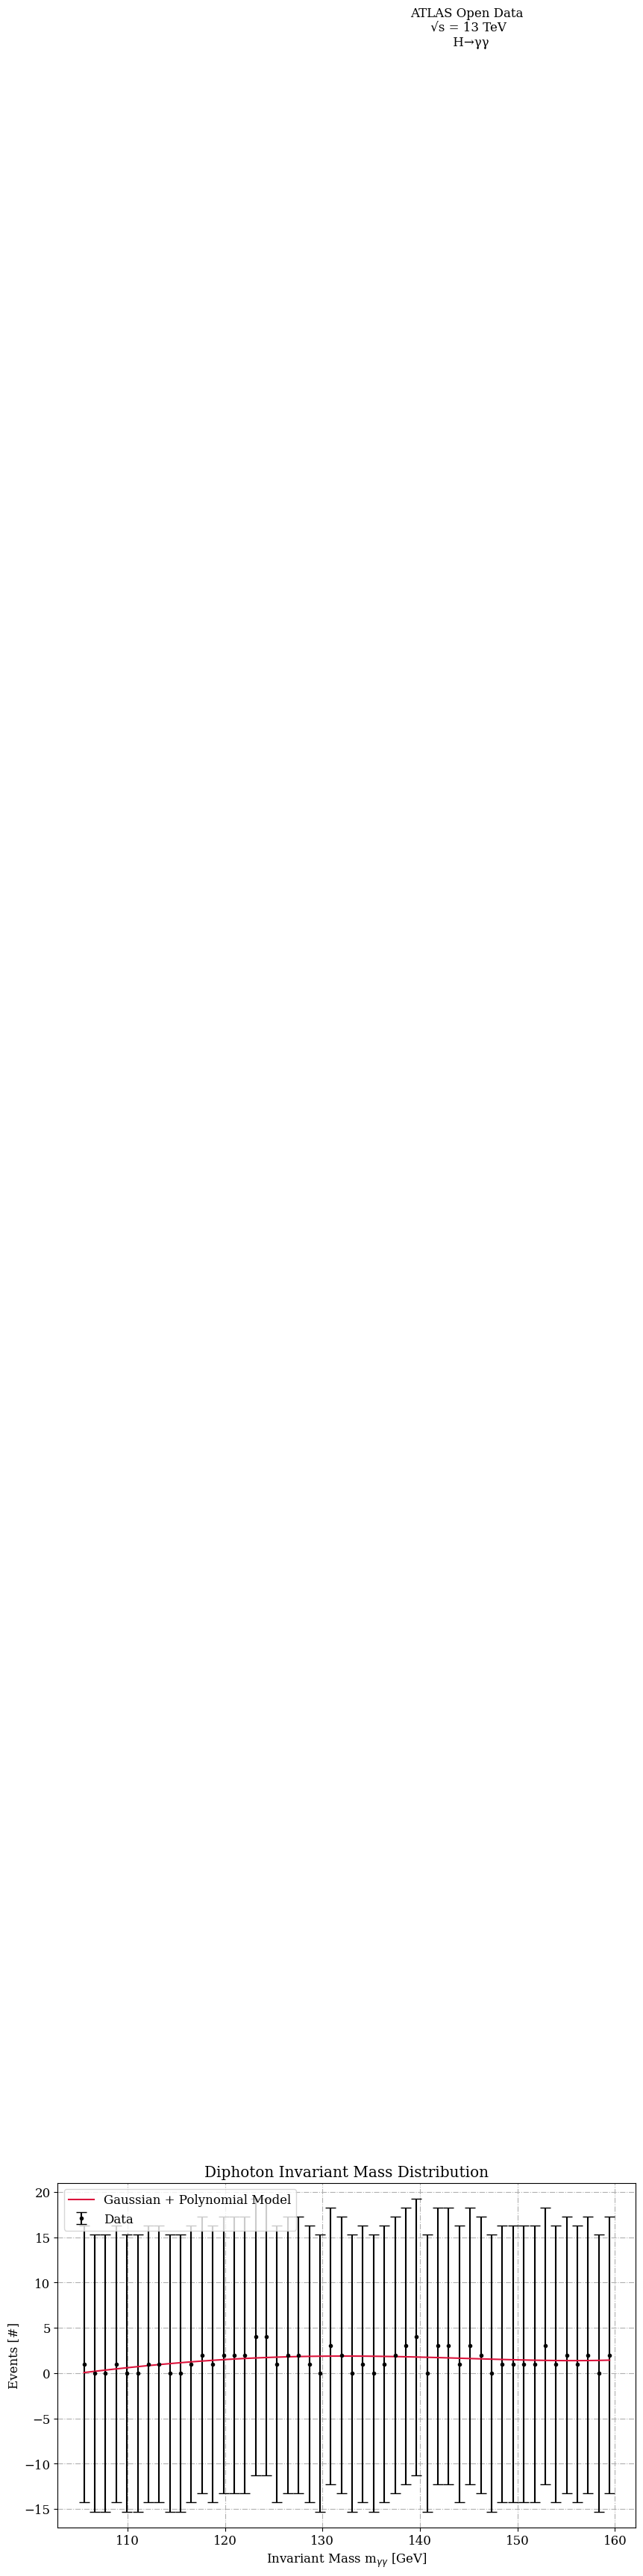

In [35]:
# Get the hist data into arrays
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

n_bins = hist.GetNbinsX()
bin_contents = [hist.GetBinContent(i) for i in range(1, n_bins + 1)]
bin_centers = [(hist.GetBinLowEdge(i) + hist.GetBinWidth(i) / 2) for i in range(1, n_bins + 1)]

# Define the model to carry out the regression
def model_function(x, a0, a1, a2, a3, a4, amplitude, mean, stddev):
    return a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

# Fit the model and get the coefficients
p0 = [1, 1, 1, 1, 1, 1, 0, 1]
popt, _ = curve_fit(model_function, bin_centers, bin_contents, p0=p0)

# Set the font and size
plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

# Plot data points with error bars along with its regression
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, bin_contents, yerr=15.29, fmt='.', color='k', ecolor='k', capsize=5, label = "Data")
plt.plot(bin_centers, model_function(np.array(bin_centers), *popt), color='crimson', label='Gaussian + Polynomial Model')

plt.xlabel('Invariant Mass m$_{\gamma\gamma}$ [GeV]')
plt.ylabel('Events [#]')
plt.title(r'Diphoton Invariant Mass Distribution')

# Append the text
plt.text(145, 257, 'ATLAS Open Data \n √s = 13 TeV \n H→γγ', fontsize=12, ha='center')  # Use '\n' for newline

plt.grid(linestyle = "-.")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Finally, understanding the results!

Now, let's understand the final histogram:
- It represents the invariant mass distribution of the four lepton system detected in the events. 
- A peak around 125 GeV in the histogram indicates the presence of the Higgs boson decaying into two photons. This is because the Higgs boson has a mass of about 125 GeV, and when it decays into four leptons, their combined invariant mass should approximately equal the Higgs boson's mass.
- The area under the curve excluding the peak represents the background. These are other processes that also produce four leptons but are not due to Higgs boson decays. It can be (and often is) modeled using Monte Carlo simulations.

So, we've reached our goal to identify and quantify the Higgs boson by recognizing its signature peak amidst the background chaos. It's like finding a needle in a haystack, but with the right tools and techniques, it becomes a thrilling hunt!